In [3]:
%load_ext sql

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

If necessary, change the following line to the correct filename. No quotation marks are needed!

In [5]:
%sql sqlite:///1005684680_Bank.sqlite

'Connected: @1005684680_Bank.sqlite'

In [6]:
result = %sql SELECT * FROM customers;

 * sqlite:///1005684680_Bank.sqlite
Done.


In [7]:
customers = result.DataFrame()

In [8]:
customers.head()

,Age,Experience,Income,Branch Address,Branch Manager,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,...,Advisor Name,Advisor Designation,Branch Address 1,Branch Manager 1,Branch Address 2,Branch Manager 2,Branch Address 3,Branch Manager 3,Branch Address 4,Branch Manager 4
0,50,24,11,8536 Country Club Dr.,Derek,4,0.6,0,0,0,...,Gala Mackson,CFP,8536 Country Club Dr.,Derek,234 Blue Spring Rd.,Ana,533 Hillcrest Street,Ankur,None,None
1,31,7,173,742 Bridle Street,Joonki,1,6,0,0,0,...,Prudence Masters,CFP,9834 East Pineknoll Ave.,Rahul,742 Bridle Street,Joonki,544 Edgewood Drive,Filip,None,None
2,41,16,10,8722 Richardson Street,Oleg,2,0.3,0,0,0,...,Collene Dubon,PFP,518 Selby Ave.,Xavier,8722 Richardson Street,Oleg,5 Maple Lane,Congyi,None,None
3,53,27,44,9587 SW. Jefferson Street,Aaditi,4,1.5,0,0,0,...,Weston Jeon,PFP,9587 SW. Jefferson Street,Aaditi,9670 Wilson Rd.,Juncheng,76 Mayfair St.,Rohini,None,None
4,29,5,33,14 Lakeshore Lane,Yuqi,1,1.8,78,0,0,...,Val Sauceda,PFP,14 Lakeshore Lane,Yuqi,890 W. Brickyard Dr.,Huimin,,,None,None


PART A

In [9]:
%sql SELECT * FROM customers LIMIT 10;

 * sqlite:///1005684680_Bank.sqlite
Done.


Age,Experience,Income,Branch Address,Branch Manager,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,Branch Address 1,Branch Manager 1,Branch Address 2,Branch Manager 2,Branch Address 3,Branch Manager 3,Branch Address 4,Branch Manager 4
50,24,11,8536 Country Club Dr.,Derek,4,0.6,0,0,0,0,0,1,Gala Mackson,CFP,8536 Country Club Dr.,Derek,234 Blue Spring Rd.,Ana,533 Hillcrest Street,Ankur,None,None
31,7,173,742 Bridle Street,Joonki,1,6,0,0,0,0,1,0,Prudence Masters,CFP,9834 East Pineknoll Ave.,Rahul,742 Bridle Street,Joonki,544 Edgewood Drive,Filip,None,None
41,16,10,8722 Richardson Street,Oleg,2,0.3,0,0,0,0,1,0,Collene Dubon,PFP,518 Selby Ave.,Xavier,8722 Richardson Street,Oleg,5 Maple Lane,Congyi,None,None
53,27,44,9587 SW. Jefferson Street,Aaditi,4,1.5,0,0,0,0,0,0,Weston Jeon,PFP,9587 SW. Jefferson Street,Aaditi,9670 Wilson Rd.,Juncheng,76 Mayfair St.,Rohini,None,None
29,5,33,14 Lakeshore Lane,Yuqi,1,1.8,78,0,0,0,1,0,Val Sauceda,PFP,14 Lakeshore Lane,Yuqi,890 W. Brickyard Dr.,Huimin,,,None,None
52,27,85,8376 Euclid Lane,Jessica,3,3.4,0,1,0,0,0,0,Ross Seipel,PFP,8376 Euclid Lane,Jessica,336 Pin Oak Ave.,Hao Yu,9834 East Pineknoll Ave.,Rahul,None,None
62,36,69,8378 West Magnolia Street,Rajarshi,2,1.7,0,0,0,0,1,0,Kathaleen Horgan,PFP,9091 S. Bowman Street,Fraser,8378 West Magnolia Street,Rajarshi,518 Selby Ave.,Xavier,None,None
47,21,20,1 Poplar St.,Jose,1,0.2,0,0,0,0,1,1,Gita Pinelli,PFP,7919 Cedarwood Dr.,Ponnappa,1 Poplar St.,Jose,,,None,None
47,21,79,4 Country Drive,Marla,3,1.1,185,0,0,0,1,1,Zetta Gephart,PFP,4 Country Drive,Marla,14 Lakeshore Lane,Yuqi,890 W. Brickyard Dr.,Huimin,None,None
48,23,70,92 Ridgewood Dr.,Mark,1,2.8,0,0,0,0,0,0,Estefana Dungan,PFP,92 Ridgewood Dr.,Mark,8376 Euclid Lane,Jessica,336 Pin Oak Ave.,Hao Yu,None,None


In [10]:
%%sql CREATE TABLE customer (
CUSTOMER_NUM CHAR(4) PRIMARY KEY,
AGE INT NOT NULL,
EXPERIENCE INT NOT NULL,
INCOME INT NOT NULL,
BRANCH_ADDRESS varchar(255) NOT NULL,
FAMILY CHAR(3),
CCAvg DECIMAL(8, 2),
MORTGAGE DECIMAL(8, 2),
PERSONAL_LOAN BOOLEAN,
BROKERAGE_ACCOUNT BOOLEAN,
GIC BOOLEAN,
ONLINE BOOLEAN,
CREDIT_CARD BOOLEAN,
ADVISOR_NAME varchar(255)
);

 * sqlite:///1005684680_Bank.sqlite
(sqlite3.OperationalError) table customer already exists
[SQL: CREATE TABLE customer (
CUSTOMER_NUM CHAR(4) PRIMARY KEY,
AGE INT NOT NULL,
EXPERIENCE INT NOT NULL,
INCOME INT NOT NULL,
BRANCH_ADDRESS varchar(255) NOT NULL,
FAMILY CHAR(3),
CCAvg DECIMAL(8, 2),
MORTGAGE DECIMAL(8, 2),
PERSONAL_LOAN BOOLEAN,
BROKERAGE_ACCOUNT BOOLEAN,
GIC BOOLEAN,
ONLINE BOOLEAN,
CREDIT_CARD BOOLEAN,
ADVISOR_NAME varchar(255)
);]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [11]:
%%sql CREATE TABLE branches (
BRANCH_ADDRESS varchar(255) PRIMARY KEY,
BRANCH_MANAGER varchar(255) NOT NULL
)

 * sqlite:///1005684680_Bank.sqlite
(sqlite3.OperationalError) table branches already exists
[SQL: CREATE TABLE branches (
BRANCH_ADDRESS varchar(255) PRIMARY KEY,
BRANCH_MANAGER varchar(255) NOT NULL
)]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [12]:
%%sql CREATE TABLE advisor (
ADVISOR_NAME varchar(255) PRIMARY KEY,
ADVISOR_DESIGNATION CHAR(3) NOT NULL,
BRANCH_1_OFTEN_SERVED BOOLEAN,
BRANCH_2_OFTEN_SERVED BOOLEAN,
BRANCH_3_OFTEN_SERVED BOOLEAN,
BRANCH_4_OFTEN_SERVED BOOLEAN
)

 * sqlite:///1005684680_Bank.sqlite
(sqlite3.OperationalError) table advisor already exists
[SQL: CREATE TABLE advisor (
ADVISOR_NAME varchar(255) PRIMARY KEY,
ADVISOR_DESIGNATION CHAR(3) NOT NULL,
BRANCH_1_OFTEN_SERVED BOOLEAN,
BRANCH_2_OFTEN_SERVED BOOLEAN,
BRANCH_3_OFTEN_SERVED BOOLEAN,
BRANCH_4_OFTEN_SERVED BOOLEAN
)]
(Background on this error at: http://sqlalche.me/e/e3q8)


Question A - v

In [13]:
%%sql
SELECT DISTINCT "Advisor Name" FROM customers ORDER BY "Advisor Name"

 * sqlite:///1005684680_Bank.sqlite
Done.


Advisor Name
Aleida Suitt
Beatriz Rolf
Bernarda Guilliams
Berry Gartman
Brandon Sum
Caitlin Wimmer
Carolin Whitmire
Carylon Race
Cecil Caves
Collene Dubon


Question A - vi

In [14]:
%%sql
SELECT
Age,
Experience,
Income,
Mortgage
FROM customers
WHERE Mortgage <> 0
LIMIT 10

 * sqlite:///1005684680_Bank.sqlite
Done.


Age,Experience,Income,Mortgage
29,5,33,78
47,21,79,185
63,39,40,118
60,36,145,380
48,24,54,186
50,24,81,248
47,22,25,148
65,41,91,146
53,23,45,132
45,19,19,94


QUESTION A - vii

In [15]:
%%sql
SELECT
"BRANCH ADDRESS", 
COUNT(*) 
FROM customers 
GROUP BY "BRANCH ADDRESS"

 * sqlite:///1005684680_Bank.sqlite
Done.


Branch Address,COUNT(*)
1 Poplar St.,130
14 Lakeshore Lane,87
177 Winchester Street,74
20 Bradford Ave.,92
218 S. Westport Court,95
234 Blue Spring Rd.,146
24 Trusel Court,118
33 Harrison Road,138
336 Pin Oak Ave.,82
36 Kent Court,93


QUESTION A - viii

In [16]:
%%sql
SELECT MAX(CCAvg)
FROM customers

 * sqlite:///1005684680_Bank.sqlite
Done.


MAX(CCAvg)
9.3


QUESTION A - ix

In [17]:
%%sql
SELECT
"Advisor Name",
COUNT(*) AS Number_Customers
FROM customers
GROUP BY "Advisor Name"
LIMIT 2

 * sqlite:///1005684680_Bank.sqlite
Done.


Advisor Name,Number_Customers
Aleida Suitt,93
Beatriz Rolf,97


In [18]:
%%sql
SELECT
AVG(SELECT COUNT(*) FROM customers GROUP BY "Advisor Name")
FROM customers

 * sqlite:///1005684680_Bank.sqlite
(sqlite3.OperationalError) near "SELECT": syntax error
[SQL: SELECT
AVG(SELECT COUNT(*) FROM customers GROUP BY "Advisor Name")
FROM customers]
(Background on this error at: http://sqlalche.me/e/e3q8)


In [19]:
%%sql
SELECT AVG(BLAH)/2 FROM (SELECT COUNT(*) AS BLAH FROM customers Group By "Advisor Name")

 * sqlite:///1005684680_Bank.sqlite
Done.


AVG(BLAH)/2
45.90816326530612


In [20]:
%%sql
SELECT "Advisor Name", COUNT(*) AS "Num_Cust" FROM customers
Group by "Advisor Name"
HAVING Num_Cust > (SELECT AVG(AvgCust)/2 
                   FROM (SELECT COUNT(*) AS AvgCust
                         FROM customers Group By "Advisor Name"))

 * sqlite:///1005684680_Bank.sqlite
Done.


Advisor Name,Num_Cust
Aleida Suitt,93
Beatriz Rolf,97
Bernarda Guilliams,101
Berry Gartman,114
Brandon Sum,94
Caitlin Wimmer,86
Carolin Whitmire,89
Carylon Race,104
Cecil Caves,99
Collene Dubon,98


PART B

In [21]:
customers.head()

,Age,Experience,Income,Branch Address,Branch Manager,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,...,Advisor Name,Advisor Designation,Branch Address 1,Branch Manager 1,Branch Address 2,Branch Manager 2,Branch Address 3,Branch Manager 3,Branch Address 4,Branch Manager 4
0,50,24,11,8536 Country Club Dr.,Derek,4,0.6,0,0,0,...,Gala Mackson,CFP,8536 Country Club Dr.,Derek,234 Blue Spring Rd.,Ana,533 Hillcrest Street,Ankur,None,None
1,31,7,173,742 Bridle Street,Joonki,1,6,0,0,0,...,Prudence Masters,CFP,9834 East Pineknoll Ave.,Rahul,742 Bridle Street,Joonki,544 Edgewood Drive,Filip,None,None
2,41,16,10,8722 Richardson Street,Oleg,2,0.3,0,0,0,...,Collene Dubon,PFP,518 Selby Ave.,Xavier,8722 Richardson Street,Oleg,5 Maple Lane,Congyi,None,None
3,53,27,44,9587 SW. Jefferson Street,Aaditi,4,1.5,0,0,0,...,Weston Jeon,PFP,9587 SW. Jefferson Street,Aaditi,9670 Wilson Rd.,Juncheng,76 Mayfair St.,Rohini,None,None
4,29,5,33,14 Lakeshore Lane,Yuqi,1,1.8,78,0,0,...,Val Sauceda,PFP,14 Lakeshore Lane,Yuqi,890 W. Brickyard Dr.,Huimin,,,None,None


In [22]:
customers.dtypes

Age                     int64
Experience              int64
Income                  int64
Branch Address         object
Branch Manager         object
Family                  int64
CCAvg                  object
Mortgage               object
Personal Loan           int64
Brokerage Account       int64
GIC Account             int64
Online                  int64
CreditCard              int64
Advisor Name           object
Advisor Designation    object
Branch Address 1       object
Branch Manager 1       object
Branch Address 2       object
Branch Manager 2       object
Branch Address 3       object
Branch Manager 3       object
Branch Address 4       object
Branch Manager 4       object
dtype: object

In [23]:
customers[['BranchAddress', 'BranchManager', 'PersonalLoan','BrokerageAccount', 'GICAccount','AdvisorName', 'AdvisorDesignation', 'BA1', 'BM1', 'BA2', 'BM2', 'BA3', 'BM3','BA4', 'BM4']] = customers[['Branch Address', 'Branch Manager', 'Personal Loan', 'Brokerage Account', 'GIC Account', 'Advisor Name', 'Advisor Designation', 'Branch Address 1', 'Branch Manager 1', 'Branch Address 2', 'Branch Manager 2', 'Branch Address 3', 'Branch Manager 3', 'Branch Address 4', 'Branch Manager 4']]
customers = customers.drop(columns=['Branch Address', 'Branch Manager',  'Personal Loan', 'Brokerage Account', 'GIC Account', 'Advisor Name', 'Advisor Designation', 'Branch Address 1', 'Branch Manager 1', 'Branch Address 2', 'Branch Manager 2', 'Branch Address 3', 'Branch Manager 3', 'Branch Address 4', 'Branch Manager 4'])
customers.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Online,CreditCard,BranchAddress,BranchManager,...,AdvisorName,AdvisorDesignation,BA1,BM1,BA2,BM2,BA3,BM3,BA4,BM4
0,50,24,11,4,0.6,0,0,1,8536 Country Club Dr.,Derek,...,Gala Mackson,CFP,8536 Country Club Dr.,Derek,234 Blue Spring Rd.,Ana,533 Hillcrest Street,Ankur,None,None
1,31,7,173,1,6,0,1,0,742 Bridle Street,Joonki,...,Prudence Masters,CFP,9834 East Pineknoll Ave.,Rahul,742 Bridle Street,Joonki,544 Edgewood Drive,Filip,None,None
2,41,16,10,2,0.3,0,1,0,8722 Richardson Street,Oleg,...,Collene Dubon,PFP,518 Selby Ave.,Xavier,8722 Richardson Street,Oleg,5 Maple Lane,Congyi,None,None
3,53,27,44,4,1.5,0,0,0,9587 SW. Jefferson Street,Aaditi,...,Weston Jeon,PFP,9587 SW. Jefferson Street,Aaditi,9670 Wilson Rd.,Juncheng,76 Mayfair St.,Rohini,None,None
4,29,5,33,1,1.8,78,1,0,14 Lakeshore Lane,Yuqi,...,Val Sauceda,PFP,14 Lakeshore Lane,Yuqi,890 W. Brickyard Dr.,Huimin,,,None,None


In [24]:
customers.describe()

,Age,Experience,Income,Family,Online,CreditCard,PersonalLoan,BrokerageAccount,GICAccount
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000
mean,45.268282,20.028895,74.303401,2.398088,0.592132,0.296733,0.106690,0.108691,0.064903
std,11.454680,11.461481,46.310561,1.147040,0.491493,0.456868,0.308754,0.311286,0.246383
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,30.000000,99.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,67.000000,43.000000,224.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
customers.dtypes

Age                    int64
Experience             int64
Income                 int64
Family                 int64
CCAvg                 object
Mortgage              object
Online                 int64
CreditCard             int64
BranchAddress         object
BranchManager         object
PersonalLoan           int64
BrokerageAccount       int64
GICAccount             int64
AdvisorName           object
AdvisorDesignation    object
BA1                   object
BM1                   object
BA2                   object
BM2                   object
BA3                   object
BM3                   object
BA4                   object
BM4                   object
dtype: object

In [26]:
customers['CCAvg'] = customers.CCAvg.str.replace(',','.')
customers['CCAvg'] = customers.CCAvg.astype(float)

In [27]:
customers['Mortgage'] = customers.Mortgage.str.replace('$','')
customers['Mortgage'] = customers.Mortgage.astype(float)

In [28]:
customers.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Mortgage              float64
Online                  int64
CreditCard              int64
BranchAddress          object
BranchManager          object
PersonalLoan            int64
BrokerageAccount        int64
GICAccount              int64
AdvisorName            object
AdvisorDesignation     object
BA1                    object
BM1                    object
BA2                    object
BM2                    object
BA3                    object
BM3                    object
BA4                    object
BM4                    object
dtype: object

In [29]:
customers = customers.dropna(axis=1, how='all')

In [30]:
customers.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Online,CreditCard,BranchAddress,BranchManager,...,BrokerageAccount,GICAccount,AdvisorName,AdvisorDesignation,BA1,BM1,BA2,BM2,BA3,BM3
0,50,24,11,4,0.6,0.0,0,1,8536 Country Club Dr.,Derek,...,0,0,Gala Mackson,CFP,8536 Country Club Dr.,Derek,234 Blue Spring Rd.,Ana,533 Hillcrest Street,Ankur
1,31,7,173,1,6.0,0.0,1,0,742 Bridle Street,Joonki,...,0,0,Prudence Masters,CFP,9834 East Pineknoll Ave.,Rahul,742 Bridle Street,Joonki,544 Edgewood Drive,Filip
2,41,16,10,2,0.3,0.0,1,0,8722 Richardson Street,Oleg,...,0,0,Collene Dubon,PFP,518 Selby Ave.,Xavier,8722 Richardson Street,Oleg,5 Maple Lane,Congyi
3,53,27,44,4,1.5,0.0,0,0,9587 SW. Jefferson Street,Aaditi,...,0,0,Weston Jeon,PFP,9587 SW. Jefferson Street,Aaditi,9670 Wilson Rd.,Juncheng,76 Mayfair St.,Rohini
4,29,5,33,1,1.8,78.0,1,0,14 Lakeshore Lane,Yuqi,...,0,0,Val Sauceda,PFP,14 Lakeshore Lane,Yuqi,890 W. Brickyard Dr.,Huimin,,


In [31]:
nonegativeexp = customers.Experience >= 0
customers = customers[nonegativeexp]
customers.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Online,CreditCard,BranchAddress,BranchManager,...,BrokerageAccount,GICAccount,AdvisorName,AdvisorDesignation,BA1,BM1,BA2,BM2,BA3,BM3
0,50,24,11,4,0.6,0.0,0,1,8536 Country Club Dr.,Derek,...,0,0,Gala Mackson,CFP,8536 Country Club Dr.,Derek,234 Blue Spring Rd.,Ana,533 Hillcrest Street,Ankur
1,31,7,173,1,6.0,0.0,1,0,742 Bridle Street,Joonki,...,0,0,Prudence Masters,CFP,9834 East Pineknoll Ave.,Rahul,742 Bridle Street,Joonki,544 Edgewood Drive,Filip
2,41,16,10,2,0.3,0.0,1,0,8722 Richardson Street,Oleg,...,0,0,Collene Dubon,PFP,518 Selby Ave.,Xavier,8722 Richardson Street,Oleg,5 Maple Lane,Congyi
3,53,27,44,4,1.5,0.0,0,0,9587 SW. Jefferson Street,Aaditi,...,0,0,Weston Jeon,PFP,9587 SW. Jefferson Street,Aaditi,9670 Wilson Rd.,Juncheng,76 Mayfair St.,Rohini
4,29,5,33,1,1.8,78.0,1,0,14 Lakeshore Lane,Yuqi,...,0,0,Val Sauceda,PFP,14 Lakeshore Lane,Yuqi,890 W. Brickyard Dr.,Huimin,,


In [32]:
customers.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Online,CreditCard,PersonalLoan,BrokerageAccount,GICAccount
count,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000
mean,45.469479,20.236086,74.330790,2.393851,1.949461,56.157540,0.592908,0.296679,0.107720,0.108393,0.065530
std,11.323444,11.319755,46.383151,1.147661,1.755083,101.858342,0.491347,0.456845,0.310061,0.310911,0.247486
min,24.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,30.000000,99.000000,3.000000,2.600000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F1CDB3608>,
      dtype=object)

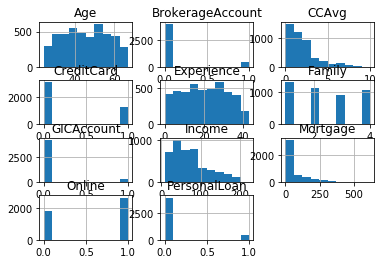

In [33]:
customers.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F1D551948>,
      dtype=object)

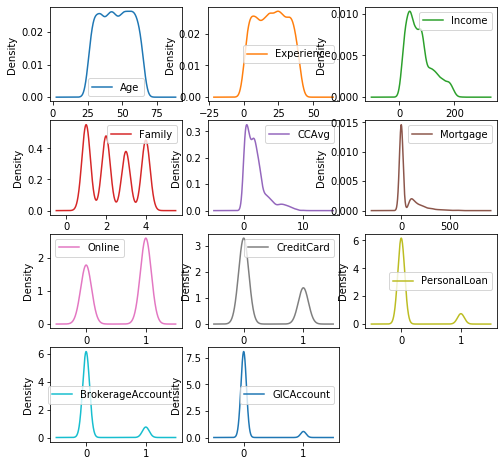

In [34]:
customers.plot(kind='density', subplots = True, layout=(4,3), sharex=False, figsize = (8,8))

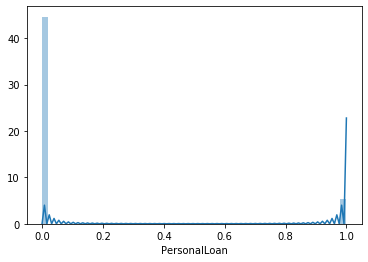

In [35]:
sns.distplot(customers['PersonalLoan'])

Text(0, 0.5, 'Number of Loans')

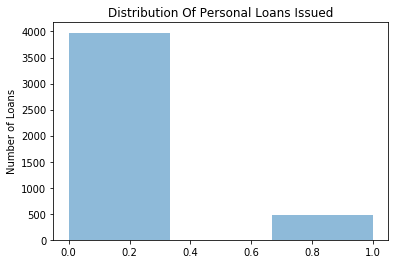

In [36]:
personal_loan = customers.PersonalLoan
plt.hist(personal_loan, bins = 3, alpha = 0.5)
plt.title('Distribution Of Personal Loans Issued')
plt.ylabel('Number of Loans')

In [37]:
brancheswereithappened = customers.PersonalLoan == 1
ploansperbranch = customers[['BranchAddress', 'PersonalLoan']]
ploansperbranch = ploansperbranch[brancheswereithappened]
ploansperbranch = ploansperbranch.groupby(['BranchAddress']).sum()
ploansperbranch

,PersonalLoan
BranchAddress,
1 Poplar St.,15
14 Lakeshore Lane,6
177 Winchester Street,4
20 Bradford Ave.,13
218 S. Westport Court,16
234 Blue Spring Rd.,17
24 Trusel Court,13
33 Harrison Road,19
336 Pin Oak Ave.,10


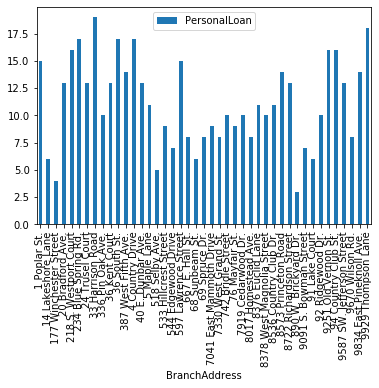

In [38]:
ploansperbranch.plot(kind='bar')

Text(0.5, 0, 'Branch Address')

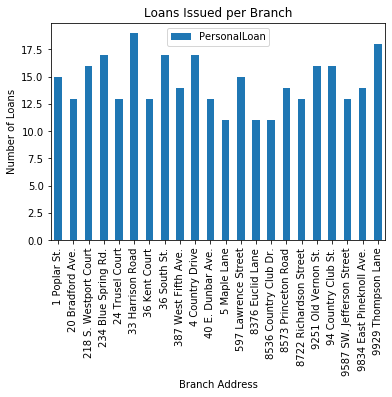

In [39]:
morethan10 = ploansperbranch.PersonalLoan > 10
bestloans = ploansperbranch[morethan10]
bestloans.plot(kind='bar')
plt.title('Loans Issued per Branch')
plt.ylabel('Number of Loans')
plt.xlabel('Branch Address')

In [40]:
perIncome = customers[['Income', 'PersonalLoan', 'CCAvg', 'Age', 'BranchAddress', 'BrokerageAccount', 'AdvisorDesignation', 'Family', 'AdvisorName']]
highrollers = (perIncome.Income > perIncome.Income.mean()).map({True:'HighIncome', False:'LowIncome'})
personalLoanperIncome = perIncome.groupby(highrollers).sum()
personalLoanperIncome

,Income,PersonalLoan,CCAvg,Age,BrokerageAccount,Family
Income,,,,,,
HighIncome,223283,474,5592.833333,84538,201,4152
LowIncome,107935,6,3093.966667,118074,282,6515


In [41]:
perIncome = customers[['Income', 'PersonalLoan', 'CCAvg', 'Age', 'BranchAddress', 'BrokerageAccount', 'AdvisorDesignation', 'Family', 'GICAccount']]
highrollers = (perIncome.Income > 110).map({True:'HighIncome', False:'LowIncome'})
personalLoanperIncome = perIncome.groupby(highrollers).sum()
personalLoanperIncome

,Income,PersonalLoan,CCAvg,Age,BrokerageAccount,Family,GICAccount
Income,,,,,,,
HighIncome,142556,411,3666.45,43169,100,1951,146
LowIncome,188662,69,5020.35,159443,383,8716,146


In [42]:
perIncome.Income.mean()

74.33078994614003

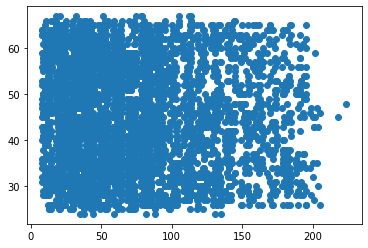

In [43]:
income = perIncome['Income']
age = perIncome['Age']
plt.scatter(income, age)

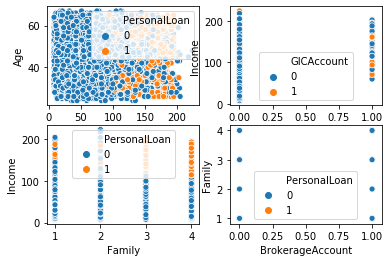

In [44]:
plt.subplot(2, 2, 1)
sns.scatterplot(x='Income', y='Age', data = perIncome, hue = 'PersonalLoan')
plt.subplot(2, 2, 2)
sns.scatterplot(x='PersonalLoan', y='Income', data = perIncome, hue = 'GICAccount')
plt.subplot(2, 2, 3)
sns.scatterplot(x = 'Family', y = 'Income', data = perIncome, hue = 'PersonalLoan')
plt.subplot(2, 2, 4)
sns.scatterplot(x = 'BrokerageAccount', y = 'Family', data = perIncome, hue = 'PersonalLoan', alpha = 1)

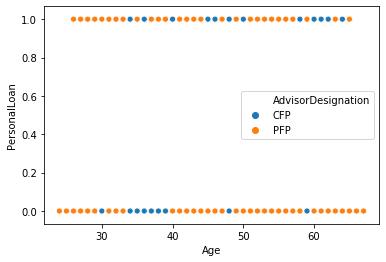

In [45]:
sns.scatterplot(x = 'Age', y = 'PersonalLoan', data = perIncome, hue = 'AdvisorDesignation')

In [46]:
conversion = customers[['PersonalLoan', 'BranchAddress', 'Age']]
conversion = conversion.groupby(['BranchAddress', 'PersonalLoan']).count()
conversion = conversion.unstack(-1)
conversion

Age    
PersonalLoan                 0   1
BranchAddress                     
1 Poplar St.               115  15
14 Lakeshore Lane           79   6
177 Winchester Street       70   4
20 Bradford Ave.            78  13
218 S. Westport Court       78  16
234 Blue Spring Rd.        127  17
24 Trusel Court            105  13
33 Harrison Road           117  19
336 Pin Oak Ave.            71  10
36 Kent Court               79  13
36 South St.               123  17
387 West Fifth Ave.         81  14
4 Country Drive             67  17
40 E. Dunbar Ave.          112  13
5 Maple Lane                92  11
518 Selby Ave.              92   5
533 Hillcrest Street        70   9
544 Edgewood Drive          90   7
597 Lawrence Street        115  15
667 E. Hall St.             80   8
68 Sunbeam St.              95   6
69 Spruce Dr.               93   8
7041 East Mammoth Drive     84   9
7330 West Grand St.         91   8
742 Bridle Street          119  10
76 Mayfair St.              74   9
7919 Cedarwood Dr.          70  10
8017 Homestead Ave.         72   8
8376 Euclid Lane            84  11
8378 West Magnolia Street   90  10
8536 Country Club Dr.      117  11
8573 Princeton Road         86  14
8722 Richardson Street     103  13
890 W. Brickyard Dr.        37   3
9091 S. Bowman Street       75   7
91 Lake Court               88   6
92 Ridgewood Dr.            90  10
9251 Old Vernon St.        121  16
94 Country Club St.        144  16
9587 SW. Jefferson Street   83  13
9670 Wilson Rd.             91   8
9834 East Pineknoll Ave.   112  14
9929 Thompson Lane         116  18

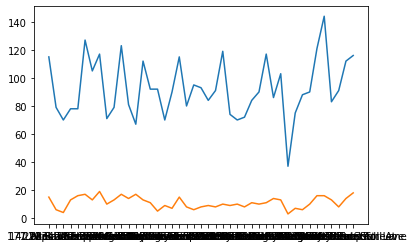

In [47]:
plt.plot(conversion)

In [48]:
correlations = customers.corr()
correlations

,Age,Experience,Income,Family,CCAvg,Mortgage,Online,CreditCard,PersonalLoan,BrokerageAccount,GICAccount
Age,1.000000,0.994115,-0.052914,-0.042403,-0.047194,-0.011704,0.009991,0.010733,-0.012361,-0.002471,0.002076
Experience,0.994115,1.000000,-0.045052,-0.048610,-0.045543,-0.010609,0.010463,0.012540,-0.012044,-0.003000,0.004652
Income,-0.052914,-0.045052,1.000000,-0.144241,0.648525,0.208653,0.015198,-0.008086,0.527535,-0.003141,0.179536
Family,-0.042403,-0.048610,-0.144241,1.000000,-0.097758,-0.015472,0.008139,0.016410,0.066203,0.019986,0.014222
CCAvg,-0.047194,-0.045543,0.648525,-0.097758,1.000000,0.103793,-0.005313,-0.003379,0.387251,0.011316,0.143203
Mortgage,-0.011704,-0.010609,0.208653,-0.015472,0.103793,1.000000,-0.001068,-0.003035,0.152456,-0.007819,0.095099
Online,0.009991,0.010463,0.015198,0.008139,-0.005313,-0.001068,1.000000,0.005175,0.009435,0.009735,0.184354
CreditCard,0.010733,0.012540,-0.008086,0.016410,-0.003379,-0.003035,0.005175,1.000000,0.000942,-0.016271,0.284637
PersonalLoan,-0.012361,-0.012044,0.527535,0.066203,0.387251,0.152456,0.009435,0.000942,1.000000,0.018561,0.317517
BrokerageAccount,-0.002471,-0.003000,-0.003141,0.019986,0.011316,-0.007819,0.009735,-0.016271,0.018561,1.000000,0.321910


In [49]:
onlyhighrollers = perIncome.Income > 110
highrollers = perIncome[onlyhighrollers]
highrollers.head()

,Income,PersonalLoan,CCAvg,Age,BranchAddress,BrokerageAccount,AdvisorDesignation,Family,GICAccount
1,173,0,6.0,31,742 Bridle Street,0,CFP,1,0
10,143,0,4.1,40,7041 East Mammoth Drive,0,PFP,1,0
11,195,0,4.7,60,7919 Cedarwood Dr.,0,PFP,1,0
12,118,1,3.0,30,597 Lawrence Street,0,CFP,4,0
14,115,0,0.3,42,7330 West Grand St.,0,PFP,1,0


Text(0.5, 1.0, 'High Income People')

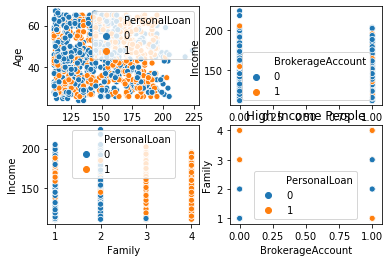

In [50]:
plt.subplot(2, 2, 1)
sns.scatterplot(x='Income', y='Age', data = highrollers, hue = 'PersonalLoan')
plt.subplot(2, 2, 2)
sns.scatterplot(x='PersonalLoan', y='Income', data = highrollers, hue = 'BrokerageAccount')
plt.subplot(2, 2, 3)
sns.scatterplot(x = 'Family', y = 'Income', data = highrollers, hue = 'PersonalLoan')
plt.subplot(2, 2, 4)
sns.scatterplot(x = 'BrokerageAccount', y = 'Family', data = highrollers, hue = 'PersonalLoan', alpha = 1)
plt.title('High Income People')

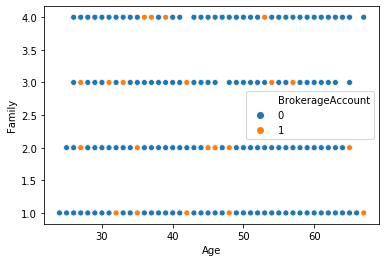

In [51]:
sns.scatterplot(x='Age', y='Family', data = highrollers, hue = 'BrokerageAccount')

In [52]:
correlationshighrollers = highrollers.corr()
correlationshighrollers

,Income,PersonalLoan,CCAvg,Age,BrokerageAccount,Family,GICAccount
Income,1.000000,0.194102,0.302980,-0.023265,-0.038399,0.028451,0.104601
PersonalLoan,0.194102,1.000000,0.061382,0.021297,0.030897,0.521365,0.350253
CCAvg,0.302980,0.061382,1.000000,-0.047048,0.027122,0.043820,0.056233
Age,-0.023265,0.021297,-0.047048,1.000000,0.028291,-0.021985,0.051809
BrokerageAccount,-0.038399,0.030897,0.027122,0.028291,1.000000,0.004159,0.350039
Family,0.028451,0.521365,0.043820,-0.021985,0.004159,1.000000,0.203432
GICAccount,0.104601,0.350253,0.056233,0.051809,0.350039,0.203432,1.000000


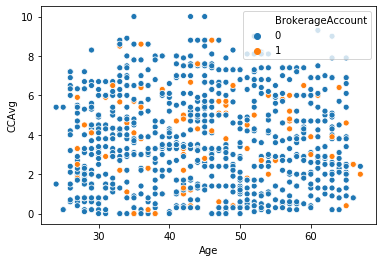

In [53]:
sns.scatterplot(x = 'Age', y = 'CCAvg', data = highrollers, hue = 'BrokerageAccount')

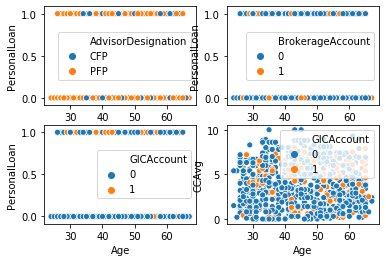

In [54]:
plt.subplot(2,2,1)
sns.scatterplot(x = 'Age', y = 'PersonalLoan', data = highrollers, hue = 'AdvisorDesignation')
plt.subplot(2,2,2)
sns.scatterplot(x = 'Age', y = 'PersonalLoan', data = highrollers, hue = 'BrokerageAccount')
plt.subplot(2,2,3)
sns.scatterplot(x = 'Age', y = 'PersonalLoan', data = highrollers, hue = 'GICAccount')
plt.subplot(2,2,4)
sns.scatterplot(x = 'Age', y = 'CCAvg', data = highrollers, hue = 'GICAccount')

Text(0, 0.5, 'Loans')

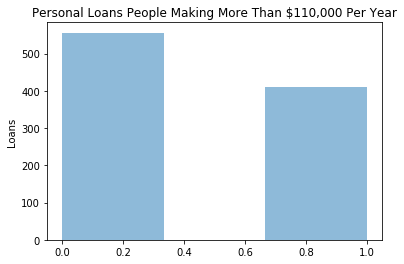

In [55]:
personal_loanHR = highrollers.PersonalLoan
plt.hist(personal_loanHR, bins = 3, alpha = 0.5)
plt.title('Personal Loans People Making More Than $110,000 Per Year')
plt.ylabel('Loans')

In [56]:
conversionHR = highrollers[['PersonalLoan', 'BranchAddress', 'Age']]
conversionHR = conversionHR.groupby(['BranchAddress', 'PersonalLoan']).count()
conversionHR = conversionHR.unstack()
conversionHR

Age    
PersonalLoan                0   1
BranchAddress                    
1 Poplar St.               16  14
14 Lakeshore Lane          10   5
177 Winchester Street       4   4
20 Bradford Ave.           12  10
218 S. Westport Court      11  15
234 Blue Spring Rd.        23  12
24 Trusel Court            14   9
33 Harrison Road           11  15
336 Pin Oak Ave.           11  10
36 Kent Court               8  12
36 South St.               15  14
387 West Fifth Ave.        13  13
4 Country Drive             5  14
40 E. Dunbar Ave.          16  11
5 Maple Lane               15   9
518 Selby Ave.             16   5
533 Hillcrest Street       13   5
544 Edgewood Drive          7   7
597 Lawrence Street        17  13
667 E. Hall St.            18   8
68 Sunbeam St.             17   5
69 Spruce Dr.              18   8
7041 East Mammoth Drive    14   8
7330 West Grand St.        11   6
742 Bridle Street          17   7
76 Mayfair St.             12   8
7919 Cedarwood Dr.          9   9
8017 Homestead Ave.        10   8
8376 Euclid Lane            6  10
8378 West Magnolia Street  12   6
8536 Country Club Dr.      16   8
8573 Princeton Road         7  13
8722 Richardson Street     16  12
890 W. Brickyard Dr.        4   3
9091 S. Bowman Street      12   7
91 Lake Court              11   6
92 Ridgewood Dr.           10   9
9251 Old Vernon St.        21  15
94 Country Club St.        21  12
9587 SW. Jefferson Street  13  11
9670 Wilson Rd.            15   8
9834 East Pineknoll Ave.   19  11
9929 Thompson Lane         10  16

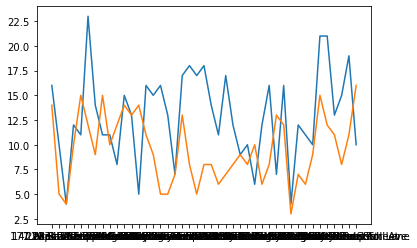

In [57]:
plt.plot(conversionHR)

In [58]:
advisors = customers[['AdvisorName', 'AdvisorDesignation', 'PersonalLoan', 'BrokerageAccount', 'Age', 'Income', 'Family', 'CCAvg']]
advisors = advisors.groupby(['AdvisorName','PersonalLoan']).count()
advisors

AdvisorDesignation  BrokerageAccount  Age  \
AdvisorName        PersonalLoan                                              
Aleida Suitt       0                             81                81   81   
                   1                              9                 9    9   
Beatriz Rolf       0                             89                89   89   
                   1                              8                 8    8   
Bernarda Guilliams 0                             92                92   92   
...                                             ...               ...  ...   
Zandra Venne       1                             16                16   16   
Zetta Gephart      0                             78                78   78   
                   1                             11                11   11   
Zofia Rambo        0                             79                79   79   
                   1                             10                10   10   

                                 Income  Family  CCAvg  
AdvisorName        PersonalLoan                         
Aleida Suitt       0                 81      81     81  
                   1                  9       9      9  
Beatriz Rolf       0                 89      89     89  
                   1                  8       8      8  
Bernarda Guilliams 0                 92      92     92  
...                                 ...     ...    ...  
Zandra Venne       1                 16      16     16  
Zetta Gephart      0                 78      78     78  
                   1                 11      11     11  
Zofia Rambo        0                 79      79     79  
                   1                 10      10     10  

[98 rows x 6 columns]

In [59]:
advisors1 = customers[['PersonalLoan', 'AdvisorName', 'Age']]
advisors1 = advisors1.groupby(['AdvisorName', 'PersonalLoan']).count()
advisors1 = advisors1.unstack()
advisors1

Age    
PersonalLoan          0   1
AdvisorName                
Aleida Suitt         81   9
Beatriz Rolf         89   8
Bernarda Guilliams   92   7
Berry Gartman       104   9
Brandon Sum          83  10
Caitlin Wimmer       79   7
Carolin Whitmire     77  11
Carylon Race         99   5
Cecil Caves          93   6
Collene Dubon        86  11
Corazon Eastin       76   6
Cyndy Calcagno       72  10
Cyril Murry         108  10
Deedra Halderman     70  13
Donetta Mallet       80  16
Elicia Schuyler      69   9
Erik Clinard         91   9
Estefana Dungan      74  10
Eulah Kicklighter    83  10
Gala Mackson         82   9
Gita Pinelli         83  11
Jacqueline Leveque   89  17
Jaquelyn Cubbage     73   9
Jodie Izquierdo      87  14
Kathaleen Horgan     82   8
Kirsten Mitchem      92   9
Kristle Hanby        72  13
Latrisha Barden      82   9
Marcelene Thomson    76   4
Margret Lan          78  15
Mariana Ghent        82  14
Marylee Bristow      84  14
Myesha Bromley       79   6
Pansy Diblasi        83   9
Pete Dickens         75   9
Prudence Masters     75   7
Ross Seipel          82  15
Siobhan Flaugher     66   9
Tanya Johansen       83   8
Taylor Kemp          69   6
Thao Lovato          65   8
Twila Bare           83   9
Val Sauceda          73   6
Vicki Sowers         80   5
Weston Jeon          85   9
Ying Michaelson      75  15
Zandra Venne         78  16
Zetta Gephart        78  11
Zofia Rambo          79  10

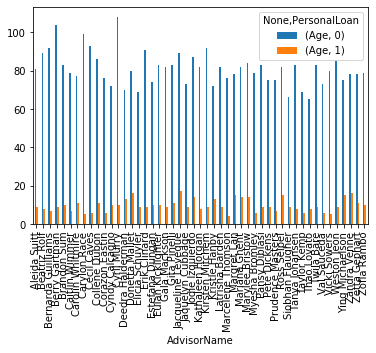

In [60]:
advisors1.plot(kind='bar')

In [61]:
advisors2 = customers[['AdvisorName', 'AdvisorDesignation', 'PersonalLoan', 'BrokerageAccount', 'Age', 'Income', 'Family', 'CCAvg']]
morethan110k = advisors2['Income'] > 110
advisors2 = advisors2[morethan110k]
advisors2

,AdvisorName,AdvisorDesignation,PersonalLoan,BrokerageAccount,Age,Income,Family,CCAvg
1,Prudence Masters,CFP,0,0,31,173,1,6.0
10,Cecil Caves,PFP,0,0,40,143,1,4.1
11,Gita Pinelli,PFP,0,0,60,195,1,4.7
12,Cyndy Calcagno,CFP,1,0,30,118,4,3.0
14,Carylon Race,PFP,0,0,42,115,1,0.3
...,...,...,...,...,...,...,...,...
4449,Marcelene Thomson,PFP,0,0,49,119,1,7.3
4453,Pansy Diblasi,PFP,0,0,51,132,1,0.3
4460,Pete Dickens,PFP,1,0,43,161,3,8.0
4485,Donetta Mallet,PFP,0,0,28,123,1,0.8


In [62]:
advisors3 = advisors2[['PersonalLoan', 'AdvisorName', 'Age']]
advisors3 = advisors3.groupby(['AdvisorName', 'PersonalLoan']).count()
advisors3 = advisors3.unstack()
advisors3

Age    
PersonalLoan         0   1
AdvisorName               
Aleida Suitt        10   6
Beatriz Rolf         8   7
Bernarda Guilliams  15   5
Berry Gartman       21   7
Brandon Sum         11   7
Caitlin Wimmer       7   7
Carolin Whitmire    13   5
Carylon Race        19   4
Cecil Caves         13   4
Collene Dubon       11  10
Corazon Eastin      14   5
Cyndy Calcagno       7  10
Cyril Murry         21   9
Deedra Halderman     6  10
Donetta Mallet       4  15
Elicia Schuyler      8   9
Erik Clinard        19   8
Estefana Dungan      9  10
Eulah Kicklighter   17   9
Gala Mackson        16   8
Gita Pinelli        10  10
Jacqueline Leveque   9  16
Jaquelyn Cubbage    12   7
Jodie Izquierdo     10  12
Kathaleen Horgan    13   6
Kirsten Mitchem     10   8
Kristle Hanby       10  11
Latrisha Barden      7   8
Marcelene Thomson   11   4
Margret Lan         15  14
Mariana Ghent        8  11
Marylee Bristow     17  13
Myesha Bromley      15   5
Pansy Diblasi       13   9
Pete Dickens         7   8
Prudence Masters    11   6
Ross Seipel          8  14
Siobhan Flaugher    14   7
Tanya Johansen      12   7
Taylor Kemp         12   4
Thao Lovato          9   7
Twila Bare           9   7
Val Sauceda         10   5
Vicki Sowers        11   4
Weston Jeon         10   8
Ying Michaelson      7  12
Zandra Venne         9  14
Zetta Gephart        7   9
Zofia Rambo         11  10

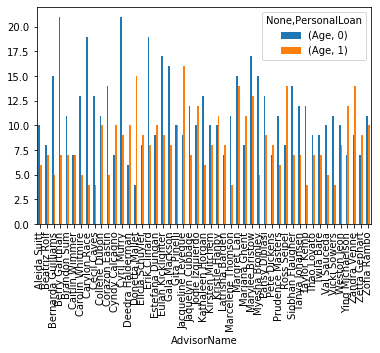

In [63]:
advisors3.plot(kind = "bar")

In [64]:
advisors4 = advisors2[['PersonalLoan', 'AdvisorName']]
advisors4 = advisors4.groupby(['AdvisorName']).sum()
advisors4

,PersonalLoan
AdvisorName,
Aleida Suitt,6
Beatriz Rolf,7
Bernarda Guilliams,5
Berry Gartman,7
Brandon Sum,7
Caitlin Wimmer,7
Carolin Whitmire,5
Carylon Race,4
Cecil Caves,4


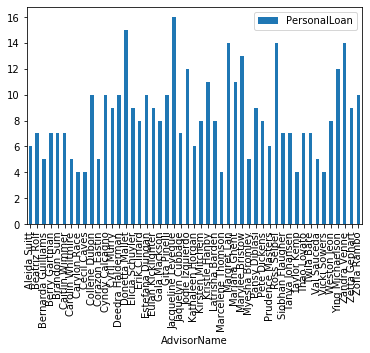

In [65]:
advisors4.plot(kind='bar')

In [66]:
advisors4.describe()

,PersonalLoan
count,49.000000
mean,8.387755
std,3.107895
min,4.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,16.000000


In [67]:
morethan10PL = advisors4.PersonalLoan > advisors4.PersonalLoan.mean()
advisors5 = advisors4[morethan10PL]
advisors5

,PersonalLoan
AdvisorName,
Collene Dubon,10
Cyndy Calcagno,10
Cyril Murry,9
Deedra Halderman,10
Donetta Mallet,15
Elicia Schuyler,9
Estefana Dungan,10
Eulah Kicklighter,9
Gita Pinelli,10


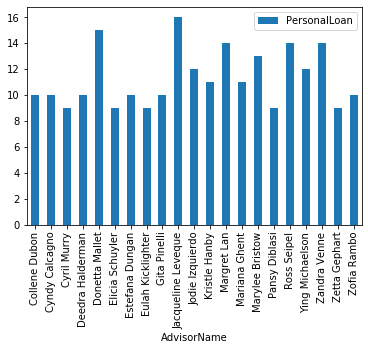

In [68]:
advisors5.plot(kind='bar')

In [69]:
lessthan10PL = advisors4.PersonalLoan < 7
advisors6 = advisors4[lessthan10PL]
advisors6

,PersonalLoan
AdvisorName,
Aleida Suitt,6
Bernarda Guilliams,5
Carolin Whitmire,5
Carylon Race,4
Cecil Caves,4
Corazon Eastin,5
Kathaleen Horgan,6
Marcelene Thomson,4
Myesha Bromley,5


Text(0, 0.5, 'Loans')

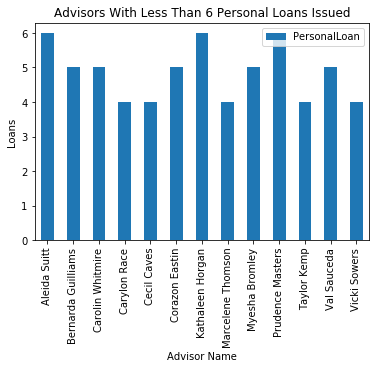

In [70]:
advisors6.plot(kind='bar')
plt.title('Advisors With Less Than 6 Personal Loans Issued')
plt.xlabel('Advisor Name')
plt.ylabel('Loans')

In [71]:
advisors7 = customers[['PersonalLoan', 'AdvisorDesignation', 'Age']]
advisors7 = advisors7.groupby(['AdvisorDesignation', 'PersonalLoan']).count()
advisors7 = advisors7.unstack()
advisors7.head()

Age     
PersonalLoan           0    1
AdvisorDesignation           
CFP                  947  125
PFP                 3029  355

Text(0, 0.5, 'Labels')

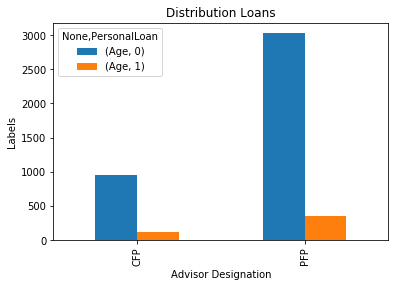

In [72]:
advisors7.plot(kind='bar')
plt.title('Distribution Loans')
plt.xlabel('Advisor Designation')
plt.ylabel('Labels')

In [79]:
crosstab = pd.crosstab(customers['PersonalLoan'], customers['AdvisorDesignation'], margins=False)
crosstab

AdvisorDesignation,CFP,PFP
PersonalLoan,,
0,947,3029
1,125,355


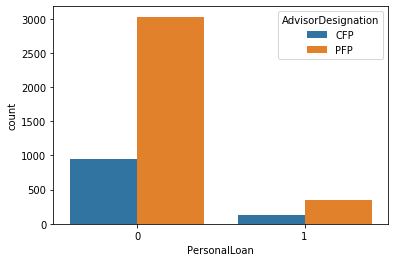

In [80]:
sns.countplot(x='PersonalLoan', hue='AdvisorDesignation', data=customers)

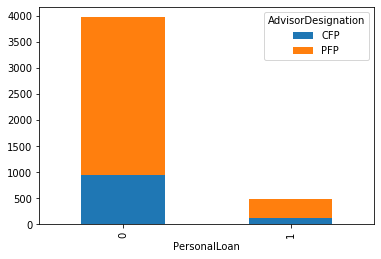

In [81]:
crosstab.plot(kind='bar', stacked = True)

In [83]:
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_norm

AdvisorDesignation,CFP,PFP
PersonalLoan,,
0,0.238179,0.761821
1,0.260417,0.739583


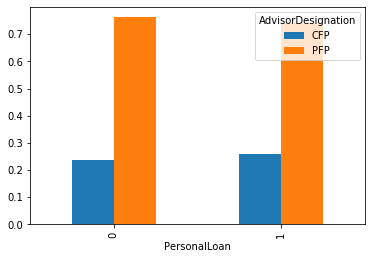

In [86]:
crosstab_norm.plot(kind='bar', stacked= False)